In [69]:
import sys
sys.path.insert(0,'..')

from nets.core import train_model, prune_parameters, get_layer_sizes, initialize_parameters
from nets.datasets import mnist_3
from nets.utils import measure_accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [2]:
X_train, X_test, y_train, y_test = mnist_3()

In [3]:
X_train.shape, y_train.shape

((784, 33600), (1, 33600))

In [4]:
X_test.shape, y_test.shape

((784, 8400), (1, 8400))

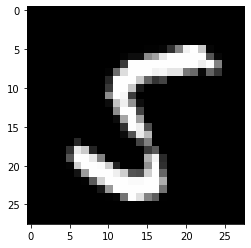

In [5]:
pixels = X_train[:, 1].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# Train the model

In [6]:
layers_dims = [784, 20, 20, 1]

In [147]:
parameters_unreg = L_layer_model(X_train, y_train, layers_dims, learning_rate=0.01, l1_term=0, num_epochs=30, print_cost=True)

Cost after epoch 0: 0.430815
Cost after epoch 1: 0.407259
Cost after epoch 2: 0.406516
Cost after epoch 3: 0.408454
Cost after epoch 4: 0.410047
Cost after epoch 5: 0.410788
Cost after epoch 6: 0.410328
Cost after epoch 7: 0.406868
Cost after epoch 8: 0.393573
Cost after epoch 9: 0.362331
Cost after epoch 10: 0.317457
Cost after epoch 11: 0.279190
Cost after epoch 12: 0.236498
Cost after epoch 13: 0.149960
Cost after epoch 14: 0.104616
Cost after epoch 15: 0.093431
Cost after epoch 16: 0.087492
Cost after epoch 17: 0.083259
Cost after epoch 18: 0.080126
Cost after epoch 19: 0.077734
Cost after epoch 20: 0.075829
Cost after epoch 21: 0.074281
Cost after epoch 22: 0.072976
Cost after epoch 23: 0.071847
Cost after epoch 24: 0.070862
Cost after epoch 25: 0.069997
Cost after epoch 26: 0.069224
Cost after epoch 27: 0.068522
Cost after epoch 28: 0.067895
Cost after epoch 29: 0.067314


In [148]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters_unreg)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9755357142857143

In [145]:
parameters_reg = L_layer_model(X_train, y_train, layers_dims, learning_rate=0.01, l1_term=0.01, num_epochs=30, print_cost=True)

Cost after epoch 0: 0.448906
Cost after epoch 1: 0.423507
Cost after epoch 2: 0.421041
Cost after epoch 3: 0.421441
Cost after epoch 4: 0.421764
Cost after epoch 5: 0.421659
Cost after epoch 6: 0.421221
Cost after epoch 7: 0.420585
Cost after epoch 8: 0.419848
Cost after epoch 9: 0.419061
Cost after epoch 10: 0.418218
Cost after epoch 11: 0.417216
Cost after epoch 12: 0.415717
Cost after epoch 13: 0.412344
Cost after epoch 14: 0.402713
Cost after epoch 15: 0.380030
Cost after epoch 16: 0.339927
Cost after epoch 17: 0.303582
Cost after epoch 18: 0.273109
Cost after epoch 19: 0.246411
Cost after epoch 20: 0.223080
Cost after epoch 21: 0.203517
Cost after epoch 22: 0.185436
Cost after epoch 23: 0.167289
Cost after epoch 24: 0.142887
Cost after epoch 25: 0.113212
Cost after epoch 26: 0.098133
Cost after epoch 27: 0.092885
Cost after epoch 28: 0.090363
Cost after epoch 29: 0.088437


In [146]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters_reg)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9736607142857143

In [59]:
parameters_scaled = L_layer_model(X_train, y_train, layers_dims, learning_rate=0.01, l1_term=0.02, self_scale=True, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.448215
Cost after epoch 1: 0.422285
Cost after epoch 2: 0.419419
Cost after epoch 3: 0.419546
Cost after epoch 4: 0.419713
Cost after epoch 5: 0.419547
Cost after epoch 6: 0.419121
Cost after epoch 7: 0.418531
Cost after epoch 8: 0.417825
Cost after epoch 9: 0.416959
Cost after epoch 10: 0.415629
Cost after epoch 11: 0.413236
Cost after epoch 12: 0.410141
Cost after epoch 13: 0.403526
Cost after epoch 14: 0.386231
Cost after epoch 15: 0.349768
Cost after epoch 16: 0.299857
Cost after epoch 17: 0.187668
Cost after epoch 18: 0.121146
Cost after epoch 19: 0.106763
Cost after epoch 20: 0.099291
Cost after epoch 21: 0.094234
Cost after epoch 22: 0.090470
Cost after epoch 23: 0.087580
Cost after epoch 24: 0.085306
Cost after epoch 25: 0.083472
Cost after epoch 26: 0.081934
Cost after epoch 27: 0.080627
Cost after epoch 28: 0.079499
Cost after epoch 29: 0.078535
Cost after epoch 30: 0.077693
Cost after epoch 31: 0.076980
Cost after epoch 32: 0.076358
Cost after epoch 33:

In [60]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters_scaled)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9853273809523809

In [61]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 8, 12, 1]

In [62]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters_pruned)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9853273809523809

In [63]:
parameters = L_layer_model(X_train, y_train, get_layer_sizes(parameters_pruned), learning_rate=0.01, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.431117
Cost after epoch 1: 0.407389
Cost after epoch 2: 0.406448
Cost after epoch 3: 0.408345
Cost after epoch 4: 0.410126
Cost after epoch 5: 0.411401
Cost after epoch 6: 0.412244
Cost after epoch 7: 0.412780
Cost after epoch 8: 0.413115
Cost after epoch 9: 0.413321
Cost after epoch 10: 0.413444
Cost after epoch 11: 0.413513
Cost after epoch 12: 0.413546
Cost after epoch 13: 0.413552
Cost after epoch 14: 0.413534
Cost after epoch 15: 0.413488
Cost after epoch 16: 0.413402
Cost after epoch 17: 0.413240
Cost after epoch 18: 0.412923
Cost after epoch 19: 0.412322
Cost after epoch 20: 0.411303
Cost after epoch 21: 0.409002
Cost after epoch 22: 0.402787
Cost after epoch 23: 0.383750
Cost after epoch 24: 0.334164
Cost after epoch 25: 0.208864
Cost after epoch 26: 0.124095
Cost after epoch 27: 0.105026
Cost after epoch 28: 0.095823
Cost after epoch 29: 0.089813
Cost after epoch 30: 0.085375
Cost after epoch 31: 0.081924
Cost after epoch 32: 0.079218
Cost after epoch 33:

In [64]:
from sklearn.metrics import accuracy_score

p, _ = L_model_forward(X_train, parameters)
y_train_pred = (p > 0.5).astype(int)
accuracy_score(y_train.reshape((-1),), y_train_pred.reshape((-1),))

0.9823809523809524

# Keeping parameters

In [ ]:
layers_dims = [784, 20, 20, 1]

In [82]:
parameters = initialize_parameters(layers_dims)
parameters = train_model(X_train, y_train, parameters, learning_rate=0.01, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.430815
Cost after epoch 1: 0.407259
Cost after epoch 2: 0.406516
Cost after epoch 3: 0.408454
Cost after epoch 4: 0.410047
Cost after epoch 5: 0.410788
Cost after epoch 6: 0.410328
Cost after epoch 7: 0.406868
Cost after epoch 8: 0.393573
Cost after epoch 9: 0.362331
Cost after epoch 10: 0.317457
Cost after epoch 11: 0.279190
Cost after epoch 12: 0.236498
Cost after epoch 13: 0.149960
Cost after epoch 14: 0.104616
Cost after epoch 15: 0.093431
Cost after epoch 16: 0.087492
Cost after epoch 17: 0.083259
Cost after epoch 18: 0.080126
Cost after epoch 19: 0.077734
Cost after epoch 20: 0.075829
Cost after epoch 21: 0.074281
Cost after epoch 22: 0.072976
Cost after epoch 23: 0.071847
Cost after epoch 24: 0.070862
Cost after epoch 25: 0.069997
Cost after epoch 26: 0.069224
Cost after epoch 27: 0.068522
Cost after epoch 28: 0.067895
Cost after epoch 29: 0.067314
Cost after epoch 30: 0.066769
Cost after epoch 31: 0.066249
Cost after epoch 32: 0.065738
Cost after epoch 33:

In [83]:
measure_accuracy(parameters, X_train, y_train)

0.9906845238095238

In [84]:
measure_accuracy(parameters, X_test, y_test)

0.9864285714285714

In [86]:
layers_dims_small = [784, 11, 14, 1]

In [87]:
parameters = initialize_parameters(layers_dims_small)
parameters_small = train_model(X_train, y_train, parameters, learning_rate=0.01, num_epochs=100, print_cost=True)

Cost after epoch 0: 0.431119
Cost after epoch 1: 0.407392
Cost after epoch 2: 0.406453
Cost after epoch 3: 0.408351
Cost after epoch 4: 0.410132
Cost after epoch 5: 0.411408
Cost after epoch 6: 0.412251
Cost after epoch 7: 0.412789
Cost after epoch 8: 0.413124
Cost after epoch 9: 0.413329
Cost after epoch 10: 0.413451
Cost after epoch 11: 0.413520
Cost after epoch 12: 0.413550
Cost after epoch 13: 0.413549
Cost after epoch 14: 0.413519
Cost after epoch 15: 0.413448
Cost after epoch 16: 0.413308
Cost after epoch 17: 0.413034
Cost after epoch 18: 0.412481
Cost after epoch 19: 0.411448
Cost after epoch 20: 0.409207
Cost after epoch 21: 0.403088
Cost after epoch 22: 0.383622
Cost after epoch 23: 0.322974
Cost after epoch 24: 0.168219
Cost after epoch 25: 0.118703
Cost after epoch 26: 0.103595
Cost after epoch 27: 0.095517
Cost after epoch 28: 0.090004
Cost after epoch 29: 0.085756
Cost after epoch 30: 0.082504
Cost after epoch 31: 0.079982
Cost after epoch 32: 0.078035
Cost after epoch 33:

In [88]:
measure_accuracy(parameters_small, X_train, y_train)

0.9866964285714286

In [89]:
measure_accuracy(parameters_small, X_test, y_test)

0.9826190476190476

In [76]:
parameters = initialize_parameters(layers_dims)
parameters_scaled = train_model(X_train, y_train, parameters, learning_rate=0.01, l1_term=0.02, self_scale=True, num_epochs=50, print_cost=True)

Cost after epoch 0: 0.448215
Cost after epoch 1: 0.422285
Cost after epoch 2: 0.419419
Cost after epoch 3: 0.419546
Cost after epoch 4: 0.419713
Cost after epoch 5: 0.419547
Cost after epoch 6: 0.419121
Cost after epoch 7: 0.418531
Cost after epoch 8: 0.417825
Cost after epoch 9: 0.416959
Cost after epoch 10: 0.415629
Cost after epoch 11: 0.413236
Cost after epoch 12: 0.410141
Cost after epoch 13: 0.403526
Cost after epoch 14: 0.386231
Cost after epoch 15: 0.349768
Cost after epoch 16: 0.299857
Cost after epoch 17: 0.187668
Cost after epoch 18: 0.121146
Cost after epoch 19: 0.106763
Cost after epoch 20: 0.099291
Cost after epoch 21: 0.094234
Cost after epoch 22: 0.090470
Cost after epoch 23: 0.087580
Cost after epoch 24: 0.085306
Cost after epoch 25: 0.083472
Cost after epoch 26: 0.081934
Cost after epoch 27: 0.080627
Cost after epoch 28: 0.079499
Cost after epoch 29: 0.078535
Cost after epoch 30: 0.077693
Cost after epoch 31: 0.076980
Cost after epoch 32: 0.076358
Cost after epoch 33:

In [78]:
measure_accuracy(parameters_scaled, X_train, y_train)

0.976547619047619

In [77]:
parameters_pruned = copy.deepcopy(parameters_scaled)
prune_parameters(parameters_pruned)
get_layer_sizes(parameters_pruned)

[784, 11, 14, 1]

In [79]:
measure_accuracy(parameters_pruned, X_train, y_train)

0.976547619047619

In [80]:
parameters_final = train_model(X_train, y_train, parameters_pruned, learning_rate=0.01, num_epochs=50, print_cost=True)

Cost after epoch 0: 0.068162
Cost after epoch 1: 0.068107
Cost after epoch 2: 0.067846
Cost after epoch 3: 0.067470
Cost after epoch 4: 0.067049
Cost after epoch 5: 0.066743
Cost after epoch 6: 0.066580
Cost after epoch 7: 0.065768
Cost after epoch 8: 0.065288
Cost after epoch 9: 0.064633
Cost after epoch 10: 0.063909
Cost after epoch 11: 0.063855
Cost after epoch 12: 0.063281
Cost after epoch 13: 0.063048
Cost after epoch 14: 0.063028
Cost after epoch 15: 0.063694
Cost after epoch 16: 0.062957
Cost after epoch 17: 0.057640
Cost after epoch 18: 0.053005
Cost after epoch 19: 0.049765
Cost after epoch 20: 0.047411
Cost after epoch 21: 0.043448
Cost after epoch 22: 0.039785
Cost after epoch 23: 0.036768
Cost after epoch 24: 0.034182
Cost after epoch 25: 0.032045
Cost after epoch 26: 0.029961
Cost after epoch 27: 0.028210
Cost after epoch 28: 0.026672
Cost after epoch 29: 0.024867
Cost after epoch 30: 0.023336
Cost after epoch 31: 0.022010
Cost after epoch 32: 0.020892
Cost after epoch 33:

In [81]:
measure_accuracy(parameters_final, X_train, y_train)

0.9891666666666666

In [85]:
measure_accuracy(parameters_final, X_test, y_test)

0.9841666666666666